Overview of seaborn plotting functions
======================================

Most of your interactions with seaborn will happen through a set of plotting functions. We will explore the specific features offered by each function later. This chapter will introduce, at a high-level, the different kinds of functions that you will encounter.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML # For displaying HTML in Jupyter notebooks
sns.set_theme() # Set the default Seaborn theme for plots

## Similar functions for similar tasks
-----------------------------------
All of the functionality is accessible at the top level, but under the code is a hierarchical structure. Function modules achieve similar visualization goals through different means. Most of the docs are structured around these modules: "relational", "distributional", and "categorical".

For example, the`distributions module` defines functions that specialize in representing the distribution of datapoints. This includes familiar methods like the histogram:

In [18]:
penguins = sns.load_dataset("penguins") # Load the penguins dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

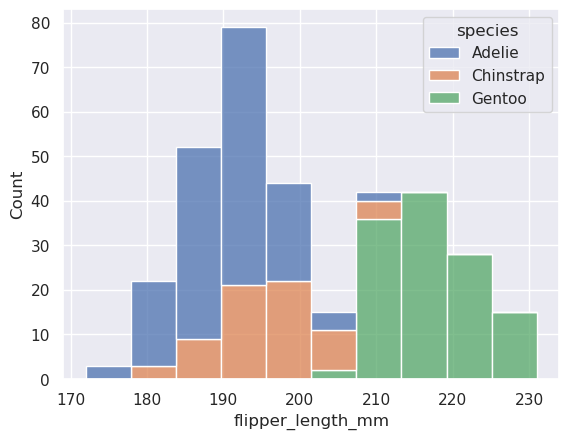

In [ ]:
#make a histogram plot
sns.histplot(data=penguins, # specify the penguins dataset
             x="flipper_length_mm",  #specify the x-axis variable to flipper length in mm
             hue="species", # specify different species for color coding
             multiple="stack"# specify to stack the bars, this allows us to see the distribution of flipper lengths across different species
             )

Along with similar, but perhaps less familiar, options such as kernel density estimation:

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

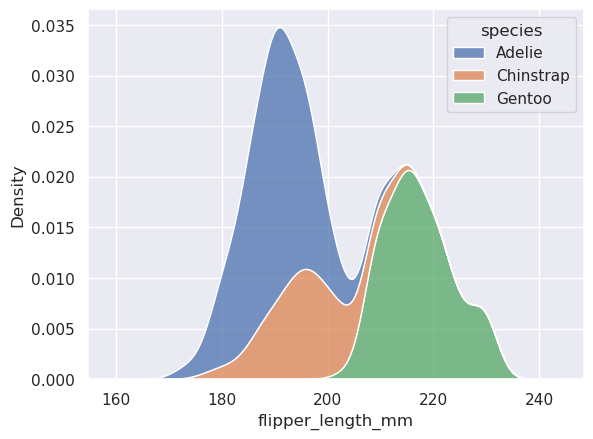

In [ ]:
#Make the same plot as above, but using a KDE plot instead of a histogram
sns.kdeplot(data=penguins, # specify the penguins dataset
            x="flipper_length_mm", # specify the x-axis variable
            hue="species", # specify different species for color coding
            multiple="stack"# specify to stack the KDEs
            )

Functions within a module share a lot of underlying code and offer similar features that may not be present in other components of the library (such as ``multiple="stack"`` in the examples above). They are designed to facilitate switching between different visual representations as you explore a dataset, because different representations often have complementary strengths and weaknesses.

## Figure-level vs. axes-level functions
-------------------------------------
In addition to the different modules, there is a cross-cutting classification of seaborn functions as "axes-level" or "figure-level". The examples above are axes-level functions. They plot data onto a single `matplotlib.pyplot.Axes` object, which is the return value of the function.

In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a `FacetGrid`, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this:

For example,`displot` is the figure-level function for the distributions module. Its default behavior is to draw a histogram, using the same code as `histplot` behind the scenes:

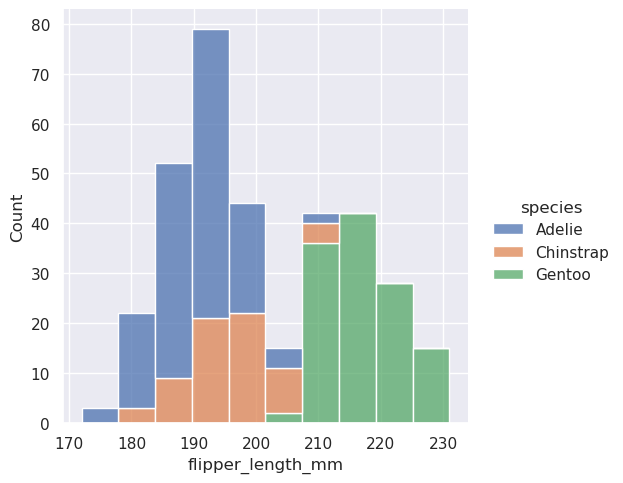

In [ ]:
#we can use the displot function to create either histogram or KDE plots by specifying the kind parameter
sns.displot(data=penguins, # specify the penguins dataset
            x="flipper_length_mm", # specify the x-axis variable
            hue="species", # specify different species for color coding
            multiple="stack",# specify to stack the plots
            kind="hist" # specify the kind of plot, can be "hist" or "kde"
            )

To draw a kernel density plot instead, using the same code as `kdeplot`, select it using the ``kind`` parameter:

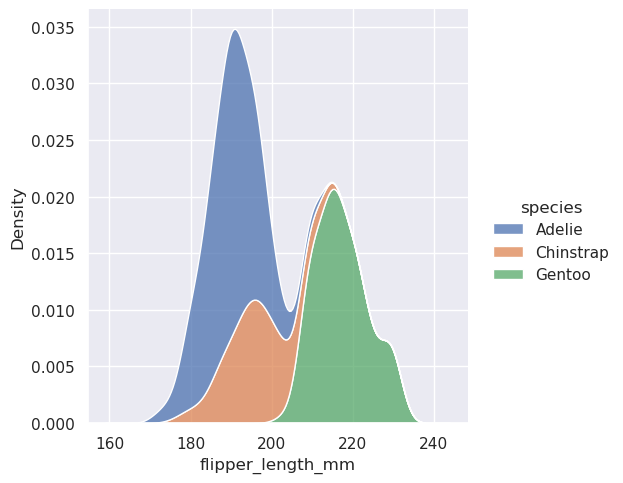

In [21]:
#use the displot function to create a stacked KDE plot, similar to the kdeplot above
sns.displot(data=penguins, # specify the penguins dataset
            x="flipper_length_mm", # specify the x-axis variable
            hue="species", # specify different species for color coding
            multiple="stack", # specify to stack the plots
            kind="kde" # specify the kind of plot as KDE
            )

You'll notice that the figure-level plots look mostly like their axes-level counterparts, but there are a few differences. Notably, the legend is placed outside the plot. They also have a slightly different shape.

The most useful feature offered by the figure-level functions is that they can easily create figures with multiple subplots. For example, instead of stacking the three distributions for each species of penguins in the same axes, we can "facet" them by plotting each distribution across the columns of the figure:

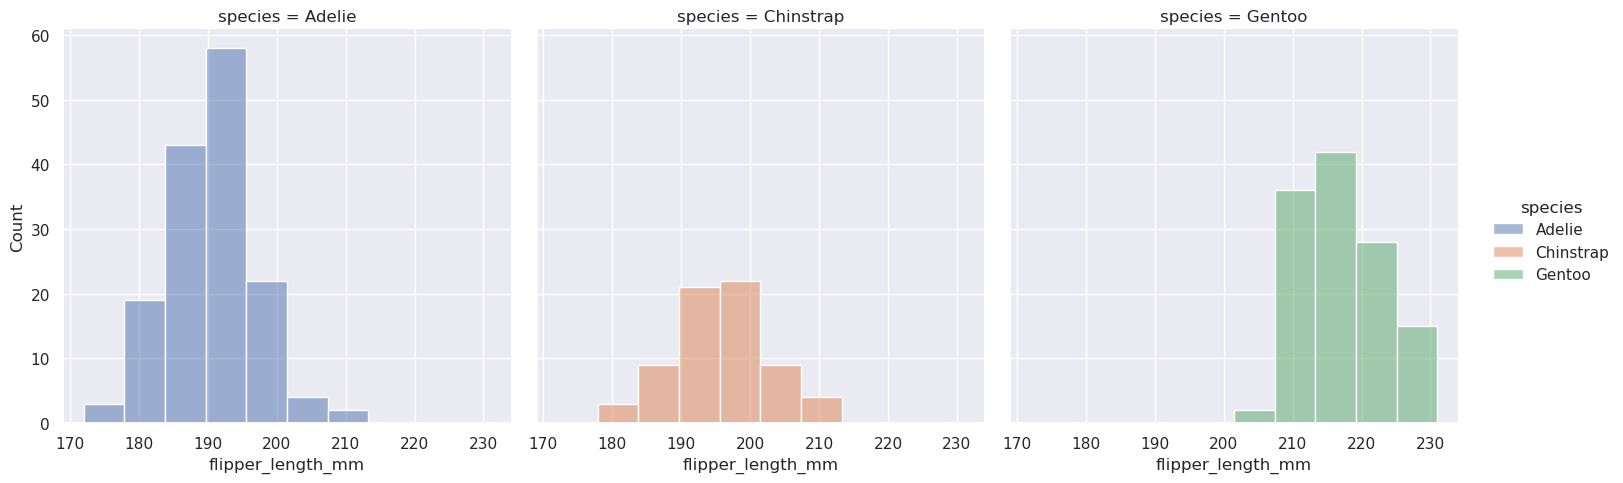

In [ ]:
#make faceted histograms for each species using displot
sns.displot(data=penguins, # specify the penguins dataset
            x="flipper_length_mm", # specify the x-axis variable
            hue="species", # specify different species for color coding
            col="species", # create a separate subplot for each species, there are three species in the penguins dataset, so there will be three subplots
            kind="hist"# specify the kind of plot as histogram
            )

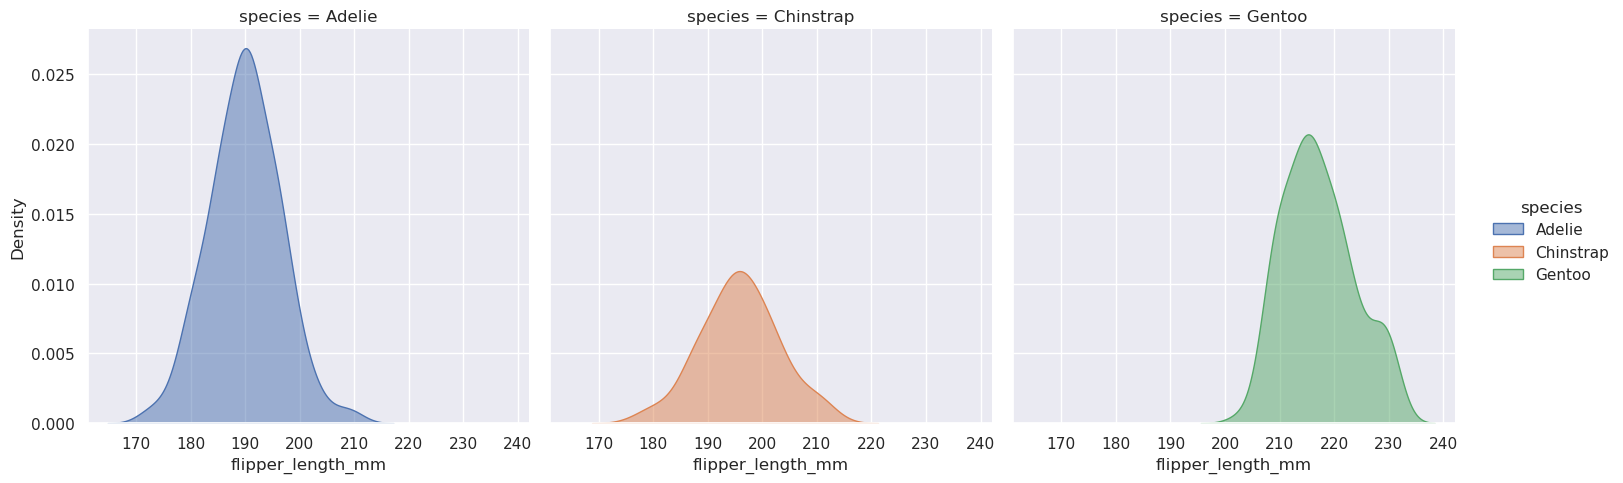

In [ ]:
#make faceted kdf plot for each species using displot
sns.displot(data=penguins, # specify the penguins dataset
            x="flipper_length_mm", # specify the x-axis variable
            hue="species", # specify different species for color coding
            col="species", # create a separate subplot for each species, there are three species in the penguins dataset, so there will be three subplots
            kind="kde",# specify the kind of plot as kernel density estimate
            fill=True, #fill in the kind parameter
            alpha=0.5 # set the transparency level of the filled areas
            )

The figure-level functions wrap their axes-level counterparts and pass the kind-specific keyword arguments (such as the bin size for a histogram) down to the underlying function. That means they are no less flexible, but there is a downside: the kind-specific parameters don't appear in the function signature or docstrings. Some of their features might be less discoverable, and you may need to look at two different pages of the documentation before understanding how to achieve a specific goal.

## Axes-level functions make self-contained plots

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don't modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call `matplotlib.pyplot.gca` internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the "currently-active" axes. But they additionally accept an ``ax=`` argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

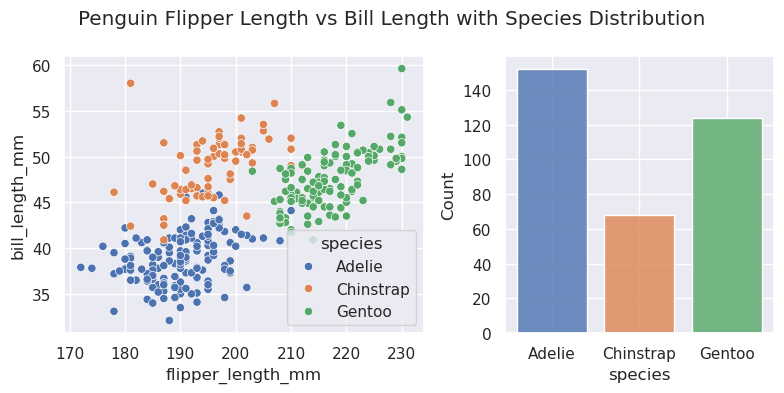

In [ ]:
#combine different plot types in a single figure using subplots
#sart with the matplotlib subplots function to create a figure with two subplots side by side
f, axs = plt.subplots(1, 2, figsize=(8, 4), # specify the 1 row, 2 columns, and figure size
                      gridspec_kw=dict(width_ratios=[4, 3]) # specify the width ratios of the subplots, 4 for the first subplot and 3 for the second
                      )

#Make a scaterplot in the first subplot 
sns.scatterplot(data=penguins, # specify the penguins dataset
                x="flipper_length_mm", y="bill_length_mm", # specify the x and y axis variables
                hue="species",  # specify different species for color coding
                ax=axs[0] # specify the first subplot, using zero-based indexing as in Matplotlib
                )

#Make a histogram in the second subplot
sns.histplot(data=penguins, # specify the penguins dataset
             x="species", # specify the x-axis variable
             hue="species", # specify different species for color coding
             shrink=.8, # shrink the width of the bars to 80% of the default width
             alpha=.8, # set the transparency level of the bars to 80%
             legend=False, # disable the legend for this subplot, it is not needed since the species are already labeled on the x-axis
             ax=axs[1] # specify the second subplot, using zero-based indexing as in Matplotlib
             )
#Use tight_layout to adjust the layout of the figure to prevent overlapping elements

#add a title to the figure
f.suptitle("Penguin Flipper Length vs Bill Length with Species Distribution") # y parameter is used to adjust the vertical position of the title
f.tight_layout() # adjust the layout of the figure to prevent overlapping elements

## Figure-level functions own their figure

In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they "own" their own figure, including its initialization, so there's no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

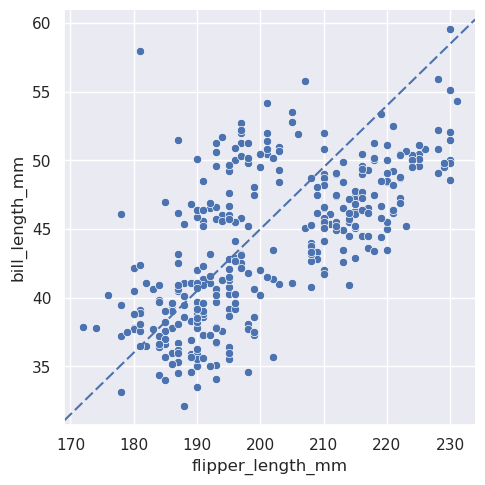

In [ ]:
#Adding a reference line to a Seaborn relational plot
g = sns.relplot(data=penguins,
                x="flipper_length_mm", y="bill_length_mm"
                )
#use matplotlib's axline method to add a reference line to the plot, slope, xy1 allows you to specify the slope and a point on the line
g.ax.axline(xy1=(200, 45), # specify a point on the line, change these values as needed
            slope=.45, # specify the slope of the line, change this value as needed, rise over run, rising 0.45 units for every 1 unit run
            color="b", # specify the color of the line
            dashes=(5, 2) # specify the dash pattern of the line, 5 pixels on, 2 pixels off
            )

Customizing plots from a figure-level function

The figure-level functions return a `FacetGrid` instance, which has a few methods for customizing attributes of the plot in a way that is "smart" about the subplot organization. For example, you can change the labels on the external axes using a single line of code:

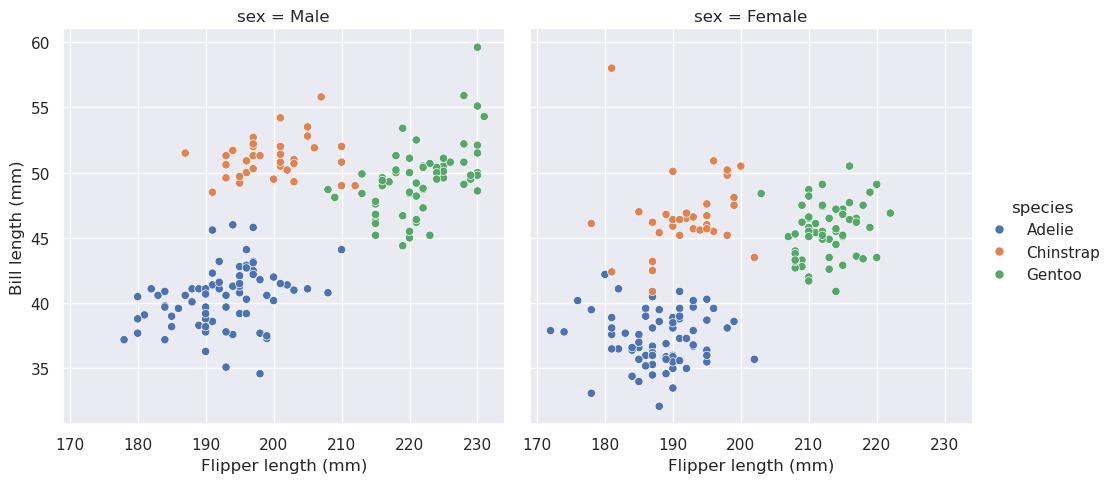

In [39]:
#Creating faceted relational plots with custom axis labels
#set the sns.replot equal to a variable
g = sns.relplot(data=penguins, # specify the penguins dataset
                x="flipper_length_mm", y="bill_length_mm", # specify the x and y axis variables
                col="sex", # specify separate subplots for each sex, can change to row to make them vertical
                hue="species" # specify different species for color coding
                )
#set custom axis labels in one line, first is the x-axis label, second is the y-axis label
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

While convenient, this does add a bit of extra complexity, as you need to remember that this method is not part of the matplotlib API and exists only when using a figure-level function.


## Specifying figure sizes

To increase or decrease the size of a matplotlib plot, you set the width and height of the entire figure, either in the `global rcParams`, while setting up the plot (e.g. with the ``figsize`` parameter of `matplotlib.pyplot.subplots`), or by calling a method on the figure object (e.g. `matplotlib.Figure.set_size_inches`). When using an axes-level function in seaborn, the same rules apply: the size of the plot is determined by the size of the figure it is part of and the axes layout in that figure.

When using a figure-level function, there are several key differences. First, the functions themselves have parameters to control the figure size (although these are actually parameters of the underlying `FacetGrid` that manages the figure). Second, these parameters, ``height`` and ``aspect``, parameterize the size slightly differently than the ``width``, ``height`` parameterization in matplotlib (using the seaborn parameters, ``width = height * aspect``). Most importantly, the parameters correspond to the size of each *subplot*, rather than the size of the overall figure.

To illustrate the difference between these approaches, here is the default output of `matplotlib.pyplot.subplots` with one subplot:

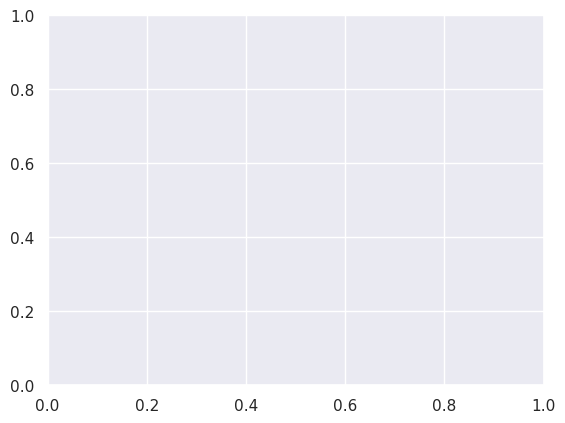

In [ ]:
f, ax = plt.subplots() #make a basic figure and axis using matplotlib, usind default settings

A figure with multiple columns will have the same overall size, but the axes will be squeezed horizontally to fit in the space, not visually appealing.

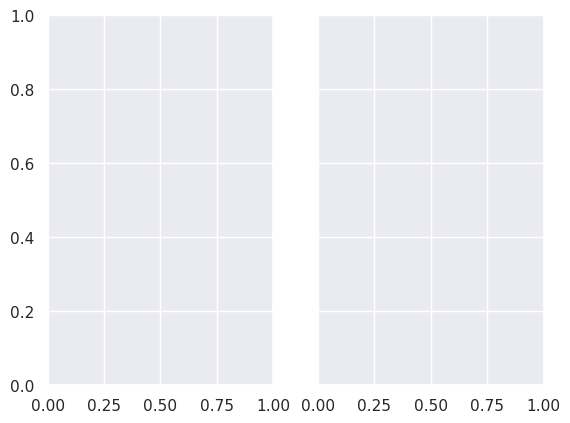

In [41]:
f, ax = plt.subplots(1, 2, sharey=True) #create a figure with two subplots side by side, sharing the y-axis

In contrast, a plot created by a figure-level function will be square.  This happens behind the scenes in functions like `relplot`, `displot`, or `catplot`:

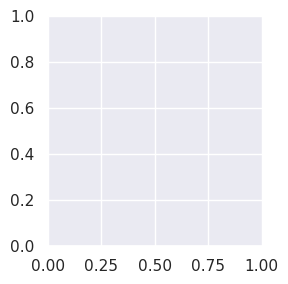

In [43]:
g = sns.FacetGrid(penguins) #create a FacetGrid object using the penguins dataset, no data ppears yet because we have not mapped any plot to it yet (No variables have been specified)

When additional columns are added, the figure itself will become wider, so that its subplots have the same size and shape:

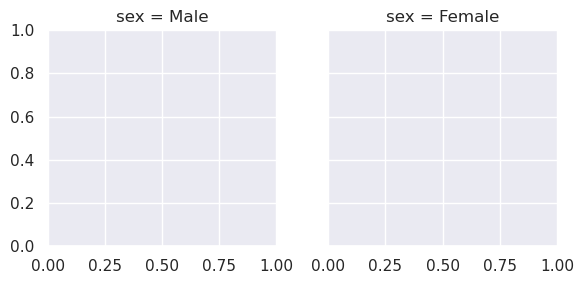

In [ ]:
g = sns.FacetGrid(penguins, col="sex") #create a FacetGrid object with separate subplots for each sex

And you can adjust the size and shape of each subplot without accounting for the total number of rows and columns in the figure:

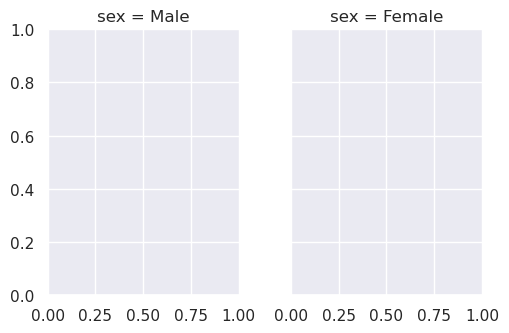

In [ ]:
g = sns.FacetGrid(penguins, #create a FacetGrid object for the penguins dataset
                  col="sex", # specify separate subplots for each sex
                  height=3.5, aspect=.75 #set the height and aspect ratio of each subplot, remember width = height * aspect. Values below 1 create narrower plots
                  )

## Merits of figure-level functions

Here is a summary of the pros and cons that we have discussed above:

| Advantage (Pro) | Drawback (Con) |
| :--- | :--- |
| Easy faceting by data variables (using `col`, `row`, `hue`) | Many figure customization parameters (like `ax` properties) are not in the main function signature |
| Legend is placed outside of the plot by default (avoids obscuring data) | Cannot easily be integrated as a subplot within a larger Matplotlib figure structure |
| Easy figure-level customization (e.g., resizing the entire grid) | Uses a different API/paradigm (FacetGrid) than standard Matplotlib and Seaborn Axes-level functions |
| Intuitive figure size parameterization (`height` and `aspect`) | Requires different figure size parameterization compared to Matplotlib's `figsize` |

Figure-level functions can add some additional complexity that can make things more confusing, but their distinct features give them additional power are generally recommended for most applications. The one situation where they are not a good choice is when you need to make a complex, standalone figure that composes multiple different plot kinds. At this point, it's recommended to set up the figure using matplotlib directly and to fill in the individual components using axes-level functions.

## Combining multiple views on the data

Two important plotting functions in seaborn don't fit cleanly into the classification scheme discussed above. These functions, `jointplot` and `pairplot`, employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: `JointGrid` an`PairGrid`, respectively.

`jointplot` plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:

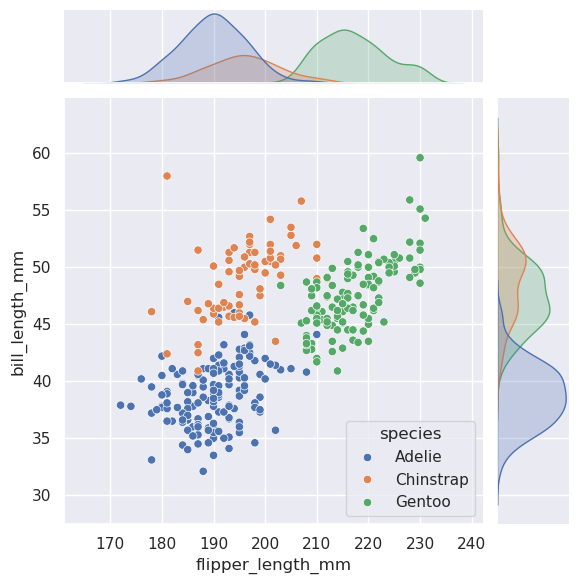

In [ ]:
#create a jointplot to visualize the relationship between flipper length and bill length, colored by species
sns.jointplot(data=penguins, # specify the penguins dataset
              x="flipper_length_mm", y="bill_length_mm", # specify the x and y axis variables
              hue="species" # specify different species for color coding
              )

The default for the `jointplot` is a scatter plot with kernal densities. We change this by inserting the kind parameter.

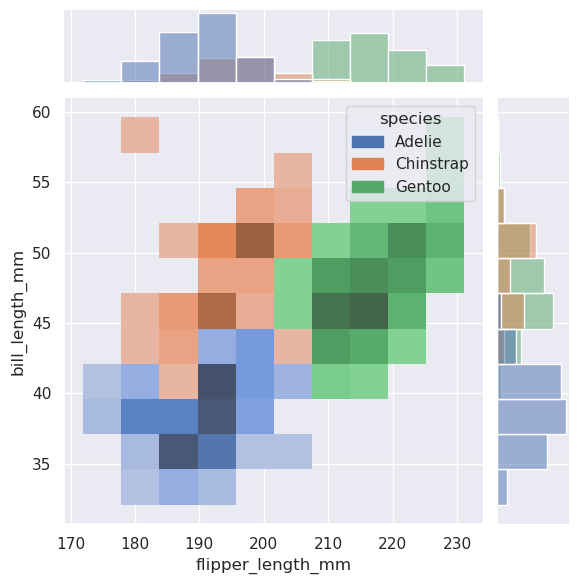

In [ ]:
sns.jointplot(data=penguins, # specify the penguins dataset
              x="flipper_length_mm", y="bill_length_mm", # specify the x and y axis variables
              hue="species", # specify different species for color coding
              kind="hist" #specify the kind of plot, can be "hist" or "kde"
              )

A key benefit of Seaborn and the `jointplot` is to allow for more control. For instance, the histograms help with understandign the data but the boxes in the main plot area do not add to the interpretation of the data. We can use key words to adjust either.

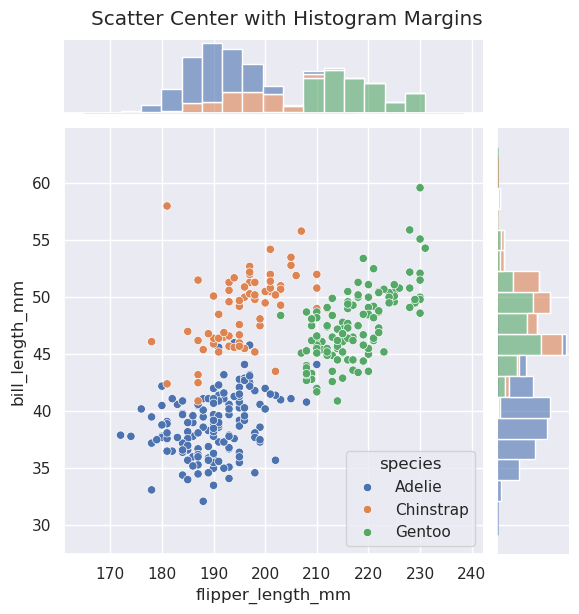

In [61]:
p = sns.jointplot(data=penguins, # specify the penguins dataset
              x="flipper_length_mm", y="bill_length_mm", # specify the x and y axis variables
              hue="species", # specify different species for color coding
              kind="scatter", #specify the kind of plot, can be "hist" or "kde" or "scatter"
              )
#use the p object to access the marginal axes and plot histograms with 15 bins and 60% transparency
p.plot_marginals(
    sns.histplot, #add a sns.histplot to the marginal axes
    bins=15, #number of bins
    alpha=0.6, # transparency level
    multiple="stack",# specify to stack the plots
)

#use matplotlib to add a title to the jointplot
plt.suptitle("Scatter Center with Histogram Margins", y=1.02) # y parameter is used to adjust the vertical position of the title
plt.show()


`pairplot` is similar — it combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:

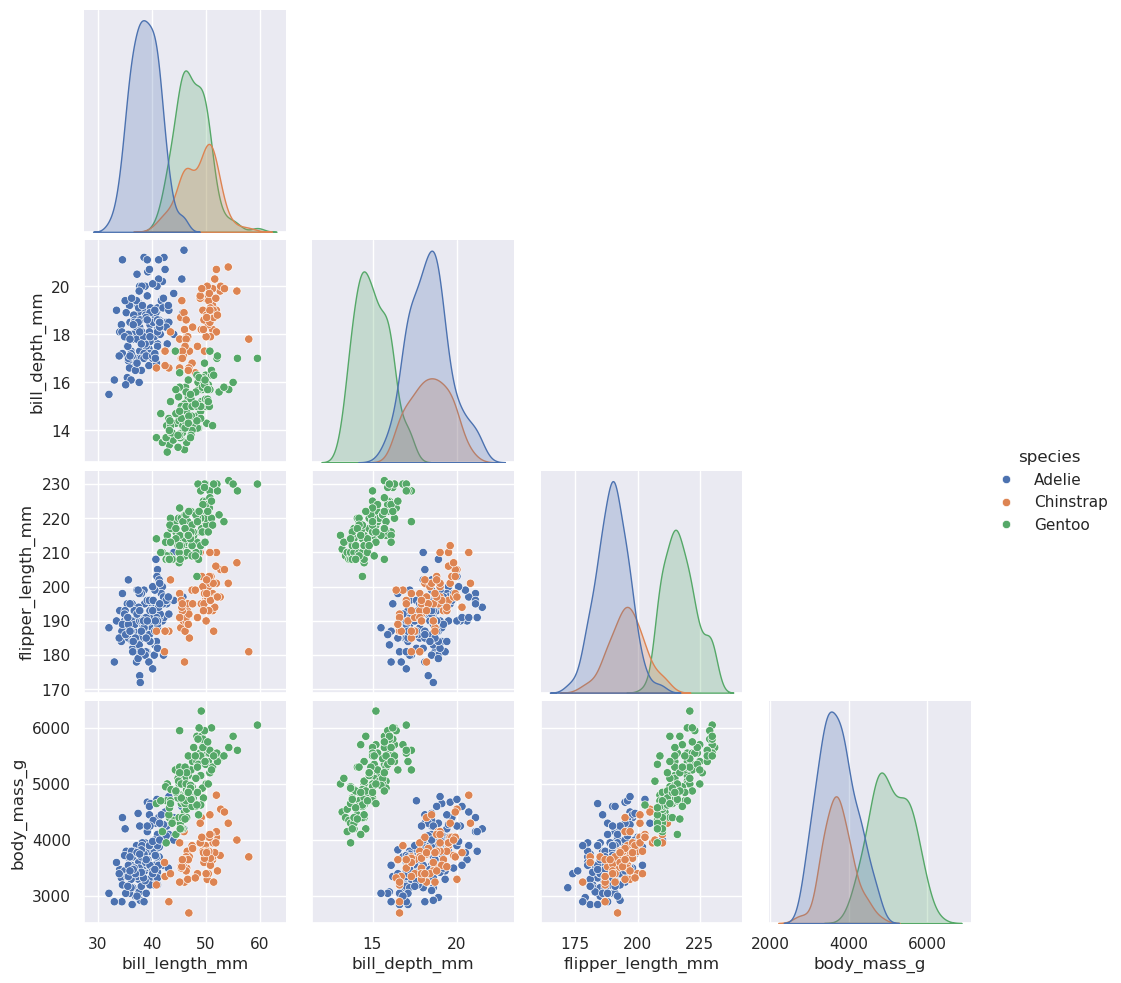

In [ ]:
sns.pairplot(data=penguins, 
             hue="species",
             diag_kind="kde", #use kernel density estimate for the diagonal plots
             corner=True #only show the lower triangle of the pairplot to avoid redundancy
             )

Now that we have learned about Seaborn functions, we will move to [Data Structures](./data_structure.ipynb)